## Assignment 3 - 30th aug 2022

#### 1. Naive Bayes Theorem

In [121]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt

In [122]:
# assume value of RV 1 represents India and 0 represents Pakistan
# X random variable representing hosting team
# Y random variable representing winning team
x1=0 # hosting by pakistan
x2=1 # hosting by india
y1=0 # won by pakistan
y2=1 # won by india
def prior(a):
    if(a==1):
        return 0.65
    if(a==0):
        return 0.35
def likelihood(a,b):
    if(b==1):
        if(a==0):
            return 0.3
        if(a==1):
            return 0.7
    if(b==0):
        if(a==0):
            return 0.75
        if(a==1):
            return 0.25
evidence = (likelihood(x2,y2)*prior(y2))+(likelihood(x2,y1)*prior(y1))

def posterior(a,b):
    return (likelihood(b,a)*prior(a))/(evidence)
print('India won the match and its probability is : ',posterior(y2,x2)) if posterior(y2,x2)>posterior(y1,x2) else print('pakistan won the match ans its probability is : ',posterior(y1,x2))

India won the match and its probability is :  0.8387096774193548


#### 2. Naive Bayes Classification

In [110]:
df = pd.read_csv(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\ml assignments new\dataset.csv")
print(df)

   tid house_owner marital_status  annual_income defaulter
0    1         yes         single         125000        no
1    2          no        married         100000        no
2    3          no         single          70000        no
3    4         yes        married         120000        no
4    5          no       divorced          95000       yes
5    6          no        married          60000        no
6    7         yes       divorced         220000        no
7    8          no         single          85000       yes
8    9          no        married          75000        no
9   10          no         single          90000       yes


In [111]:
# by looking at the dataset, home_owner is discriminating

In [112]:
df1 = df.replace(["yes","no","single","married","divorced"],[1,0,0,1,2])

In [113]:
df1

,tid,house_owner,marital_status,annual_income,defaulter
0,1,1,0,125000,0
1,2,0,1,100000,0
2,3,0,0,70000,0
3,4,1,1,120000,0
4,5,0,2,95000,1
5,6,0,1,60000,0
6,7,1,2,220000,0
7,8,0,0,85000,1
8,9,0,1,75000,0
9,10,0,0,90000,1


In [114]:
# defaulter d1(yes) = 1, d2(no) = 0
# home_owner h1(yes) = 1, h2(no) = 0
h1=1 #homeowner
h2=0 #notAHomeOwner
d1=1 #defaulter
d2=0 #notADefaulter
m1=0 #single
m2=1 #married
m3=2 #divorced

def prior(a):
    if(a==1):
        return df1['house_owner'].value_counts().iloc[1]/len(df1)  #homeowner
    if(a==0):
        return df1['house_owner'].value_counts().iloc[0]/len(df1)  #notAHomeOwner
def likelihood1(d,h):
    if(h==h1):
        return len(df1.loc[(df1['house_owner']==h1)&(df1['defaulter']==d)].value_counts())/len(df1.loc[(df1['house_owner']==1)].value_counts())
    if(h==h2):
        return len(df1.loc[(df1['house_owner']==h2)&(df1['defaulter']==d)].value_counts())/len(df1.loc[(df1['house_owner']==0)].value_counts())

evidence1 = (likelihood1(d1,h1)*prior(h1))+(likelihood1(d1,h2)*prior(h2))


def prior2(m):
    if(m==m1):
        return df1['marital_status'].value_counts().iloc[0]/len(df1)  #homeowner
    if(m==m2):
        return df1['marital_status'].value_counts().iloc[1]/len(df1)  #homeowner
    if(m==m3):
        return df1['marital_status'].value_counts().iloc[2]/len(df1)  #homeowner

def likelihood2(d,m):
    if(m==m1):
        return len(df1.loc[(df1['marital_status']==m1)&(df1['defaulter']==d)].value_counts())/len(df1.loc[(df1['marital_status']==m1)].value_counts())
    if(m==m2):
        return len(df1.loc[(df1['marital_status']==m2)&(df1['defaulter']==d)].value_counts())/len(df1.loc[(df1['marital_status']==m2)].value_counts())
    if(m==m3):
        return len(df1.loc[(df1['marital_status']==m3)&(df1['defaulter']==d)].value_counts())/len(df1.loc[(df1['marital_status']==m3)].value_counts())

evidence2 =  (likelihood2(d1,m1)*prior2(m1))+(likelihood2(d1,m2)*prior2(m2))+(likelihood2(d1,m3)*prior2(m3))

ph1byd1 = (likelihood1(d1,h1)*prior(h1))/evidence
ph2byd1 = (likelihood1(d1,h2)*prior(h2))/evidence
pm1byd1 = (likelihood2(d1,m1)*prior2(m1))/evidence2
pm2byd1 = (likelihood2(d1,m2)*prior2(m2))/evidence2
pm3byd1 = (likelihood2(d1,m3)*prior2(m3))/evidence2


In [115]:
print('P(home_owner/defaulter) = ',ph1byd1)
print('P(notHomeOwner/defaulter) = ',ph2byd1)
print('P(single/defaulter) = ', pm1byd1)
print('P(married/defaulter) = ',pm2byd1)
print('P(divorced/dafaulter) = ',pm3byd1)

P(home_owner/defaulter) =  0.0
P(notHomeOwner/defaulter) =  0.5529953917050692
P(single/defaulter) =  0.6666666666666666
P(married/defaulter) =  0.0
P(divorced/dafaulter) =  0.3333333333333333


In [140]:
meanOfIncome=df1.describe()['annual_income'].iloc[1]
stdOfIncome=df1.describe()['annual_income'].iloc[2]
varianceOfIncome=stdOfIncome*stdOfIncome
print(meanOfIncome,stdOfIncome,varianceOfIncome)

104000.0 45631.373223060276 2082222222.2222223


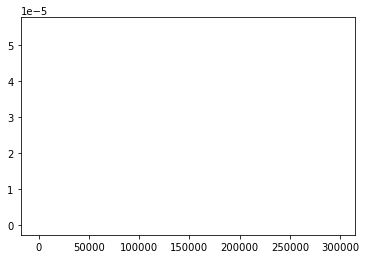

In [144]:
def gaussian(sigma,u,x):
        return (1/sigma*(math.sqrt(2*math.pi)))*(math.exp(-(x-u)*(x-u)/(2*sigma*sigma)))

for x in np.linspace(-3000,300000,300):
    plt.plot(x,gaussian(stdOfIncome,meanOfIncome,x))
    

In [ ]:
h=h2
m=m2
income=120000
